## Assignment-2

### 1. In this exercise, we will predict the number of applications received using the other variables in the College data set in the ISLR2 package.

#### a. Split the data set into a training set and a test set. Fit a linear model using least squares on the training set, and report the test error obtained.

In [2]:
install.packages("ISLR2")
library("ISLR2")

Installing package into 'C:/Users/Sahiti/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ISLR2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sahiti\AppData\Local\Temp\RtmpSMXLaT\downloaded_packages


In [3]:
collegeDf<-data.frame(College)

In [4]:
head(collegeDf)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


Loading the libraries required for evaluating test metrics and splitting the dataset.

In [5]:
library(plyr)
library(readr)
library(dplyr)
library(caret)
library(ggplot2)
library(repr)


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice



Setting the seed value to reproduce accurate results.

In [6]:
set.seed(125)

Splitting the dataset into training and test

In [7]:
library(caTools)

In [8]:
splitDf <- sample.split(collegeDf$Apps, SplitRatio = 0.7)

In [9]:
glimpse(splitDf)

 logi [1:777] FALSE TRUE TRUE TRUE FALSE FALSE ...


In [10]:
trainingData = subset(collegeDf, splitDf= True)

In [11]:
testData = subset(collegeDf, splitDf = False)

-------------------------------------------------------------------------------------------------------------------------------
Scaling the numeric features

In [12]:
preProcessObj <- preProcess(trainingData, method = c('center', 'scale'))
#After preprocessing, let us predict
trainingData <- predict(preProcessObj, trainingData)
testData <- predict(preProcessObj, testData)

In [13]:
summary(trainingData)

 Private        Apps             Accept            Enroll       
 No :212   Min.   :-0.7546   Min.   :-0.7943   Min.   :-0.8018  
 Yes:565   1st Qu.:-0.5751   1st Qu.:-0.5772   1st Qu.:-0.5790  
           Median :-0.3730   Median :-0.3708   Median :-0.3723  
           Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
           3rd Qu.: 0.1608   3rd Qu.: 0.1653   3rd Qu.: 0.1313  
           Max.   :11.6512   Max.   : 9.9184   Max.   : 6.0398  
   Top10perc         Top25perc         F.Undergrad       P.Undergrad      
 Min.   :-1.5056   Min.   :-2.36290   Min.   :-0.7341   Min.   :-0.56114  
 1st Qu.:-0.7119   1st Qu.:-0.74713   1st Qu.:-0.5583   1st Qu.:-0.49940  
 Median :-0.2584   Median :-0.09072   Median :-0.4109   Median :-0.32993  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.4218   3rd Qu.: 0.66667   3rd Qu.: 0.0629   3rd Qu.: 0.07337  
 Max.   : 3.8798   Max.   : 2.23195   Max.   : 5.7610   Max.   :13.78104  
    Outstate        

Performing linear regression model on the dataset

In [14]:
lr = lm(Apps ~., data = trainingData)
summary(lr)


Call:
lm(formula = Apps ~ ., data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26836 -0.11116 -0.00762  0.08328  2.02896 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0928436  0.0276336   3.360 0.000819 ***
PrivateYes  -0.1276804  0.0356085  -3.586 0.000358 ***
Accept       1.0043390  0.0258023  38.924  < 2e-16 ***
Enroll      -0.2114403  0.0446464  -4.736 2.60e-06 ***
Top10perc    0.2275638  0.0254256   8.950  < 2e-16 ***
Top25perc   -0.0728413  0.0229209  -3.178 0.001543 ** 
F.Undergrad  0.0719256  0.0410000   1.754 0.079785 .  
P.Undergrad  0.0174841  0.0126434   1.383 0.167114    
Outstate    -0.0892606  0.0198081  -4.506 7.64e-06 ***
Room.Board   0.0427964  0.0136848   3.127 0.001832 ** 
Books        0.0008915  0.0101706   0.088 0.930175    
Personal     0.0054416  0.0110348   0.493 0.622060    
PhD         -0.0366141  0.0195681  -1.871 0.061714 .  
Terminal    -0.0126699  0.0193813  -0.654 0.513492    
S.F.R

From the above statistics, we got to know that R-squared error is equal to 0.929 which means that the explanatory variables can perfectly explain the variance in the response variable. Also the adjusted R-squared value is 0.9276 which means that it is a very good value to show the accuracy of the data model.

In [15]:
#Difference between training data and predictions
eval_metrics = function(model, dataframe, predictions, target){
    resids = dataframe[,target] - predictions
    residSquare = resids**2
    N = length(predictions)
    r2 = as.character(round(summary(model)$r.squared, 2))
    adj_r2 = as.character(round(summary(model)$adj.r.squared, 2))
    RMSE = as.character(round(sqrt(sum(residSquare)/N),2))
    data.frame(
        RMSE = RMSE,
        adj_r2 = adj_r2
    )
}

#Predicting and evaluating the model on training data
predictionsTrain = predict(lr, newdata = trainingData)
eval_metrics(lr, trainingData, predictionsTrain, target = 'Apps')

#Predicting and evaluating the model on test data
predictionsTest = predict(lr, newdata = testData)
eval_metrics(lr, testData, predictionsTest, target = 'Apps')

RMSE,adj_r2
<chr>,<chr>
0.27,0.93


RMSE,adj_r2
<chr>,<chr>
0.27,0.93


We got RMSE = '0.27' and adj_r2 = '0.93', a good model must have low RMSE and high adjusted r2 which proves we have a good model.

In [16]:
#We can also calculate the error data using below method:
(linearInfo <- postResample(predictionsTest, testData$Apps))

RMSE  Rsquared       MAE 
0.2659326 0.9291887 0.1559887

#### b. Fit a ridge regression model on the training set, with λ chosen by crossvalidation. Report the test error obtained.

In [17]:
#To proceed with ridge regression model, we have to create a numeric matrix with training data and vector of test variables
encodedData <- dummyVars(Apps ~ ., data = trainingData)

In [18]:
dummyTrainData = predict(encodedData, newdata = trainingData)

In [19]:
dummyTestData = predict(encodedData, newdata = testData)

In [20]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-4



In [21]:
x_train = as.matrix(dummyTrainData)

In [22]:
head(x_train)

,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,0,1,-0.32099869,-0.06346802,-0.2584163,-0.1917039,-0.1680076,-0.20907246,-0.7458755,-0.9642836,-0.6019244,1.2692276,-0.1629230,-0.1156542,1.0131234,-0.8670157,-0.50158700,-0.3180471
Adelphi University,0,1,-0.03867808,-0.28839845,-0.6552335,-1.3530399,-0.2096534,0.24414978,0.4572019,1.9079789,1.2150971,0.2353633,-2.6739232,-3.3760014,-0.4773970,-0.5442217,0.16600292,-0.5509070
Adrian College,0,1,-0.37607569,-0.47781355,-0.3151045,-0.2926897,-0.5492116,-0.49677006,0.2011751,-0.5539604,-0.9047614,-0.2594146,-1.2040694,-0.9307410,-0.3005556,0.5855576,-0.17717583,-0.6673369
Agnes Scott College,0,1,-0.68124306,-0.69198176,1.8390460,1.6765321,-0.6576558,-0.52041644,0.6262293,0.9961495,-0.6019244,-0.6877298,1.1844430,1.1748999,-1.6142346,1.1504472,1.79169738,-0.3762621
Alaska Pacific University,0,1,-0.76406254,-0.78023197,-0.6552335,-0.5956469,-0.7114656,0.00899969,-0.7160471,-0.2165835,1.5179340,0.2353633,0.2045405,-0.5231976,-0.5531862,-1.6740009,0.24164779,-2.9377211
Albertson College,0,1,-0.62820595,-0.66938109,0.5919062,0.3132247,-0.6230197,-0.53486701,0.7604569,-0.9323696,-0.2990875,-0.9831196,-0.3466547,-0.4552737,-1.1847626,-0.9477142,0.01279812,-0.6091220


In [23]:
y_train = trainingData$Apps

In [24]:
head(y_train)

[1] -0.3466585 -0.2107483 -0.4066037 -0.6678304 -0.7257086 -0.6239051

In [25]:
x_test = as.matrix(dummyTestData)

In [26]:
head(x_test)

,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,0,1,-0.32099869,-0.06346802,-0.2584163,-0.1917039,-0.1680076,-0.20907246,-0.7458755,-0.9642836,-0.6019244,1.2692276,-0.1629230,-0.1156542,1.0131234,-0.8670157,-0.50158700,-0.3180471
Adelphi University,0,1,-0.03867808,-0.28839845,-0.6552335,-1.3530399,-0.2096534,0.24414978,0.4572019,1.9079789,1.2150971,0.2353633,-2.6739232,-3.3760014,-0.4773970,-0.5442217,0.16600292,-0.5509070
Adrian College,0,1,-0.37607569,-0.47781355,-0.3151045,-0.2926897,-0.5492116,-0.49677006,0.2011751,-0.5539604,-0.9047614,-0.2594146,-1.2040694,-0.9307410,-0.3005556,0.5855576,-0.17717583,-0.6673369
Agnes Scott College,0,1,-0.68124306,-0.69198176,1.8390460,1.6765321,-0.6576558,-0.52041644,0.6262293,0.9961495,-0.6019244,-0.6877298,1.1844430,1.1748999,-1.6142346,1.1504472,1.79169738,-0.3762621
Alaska Pacific University,0,1,-0.76406254,-0.78023197,-0.6552335,-0.5956469,-0.7114656,0.00899969,-0.7160471,-0.2165835,1.5179340,0.2353633,0.2045405,-0.5231976,-0.5531862,-1.6740009,0.24164779,-2.9377211
Albertson College,0,1,-0.62820595,-0.66938109,0.5919062,0.3132247,-0.6230197,-0.53486701,0.7604569,-0.9323696,-0.2990875,-0.9831196,-0.3466547,-0.4552737,-1.1847626,-0.9477142,0.01279812,-0.6091220


In [27]:
y_test = testData$Apps

In [28]:
head(y_test)

[1] -0.3466585 -0.2107483 -0.4066037 -0.6678304 -0.7257086 -0.6239051

Here, we have created training and testing matrices, training and testing vectors
Creating list of lambda values for the model to try

In [29]:
lambdas = lambdas <- 10^seq(2, -3, by = -.1)

In [30]:
lambdas

[1] 1.000000e+02 7.943282e+01 6.309573e+01 5.011872e+01 3.981072e+01
 [6] 3.162278e+01 2.511886e+01 1.995262e+01 1.584893e+01 1.258925e+01
[11] 1.000000e+01 7.943282e+00 6.309573e+00 5.011872e+00 3.981072e+00
[16] 3.162278e+00 2.511886e+00 1.995262e+00 1.584893e+00 1.258925e+00
[21] 1.000000e+00 7.943282e-01 6.309573e-01 5.011872e-01 3.981072e-01
[26] 3.162278e-01 2.511886e-01 1.995262e-01 1.584893e-01 1.258925e-01
[31] 1.000000e-01 7.943282e-02 6.309573e-02 5.011872e-02 3.981072e-02
[36] 3.162278e-02 2.511886e-02 1.995262e-02 1.584893e-02 1.258925e-02
[41] 1.000000e-02 7.943282e-03 6.309573e-03 5.011872e-03 3.981072e-03
[46] 3.162278e-03 2.511886e-03 1.995262e-03 1.584893e-03 1.258925e-03
[51] 1.000000e-03

In [31]:
#For ridge regression, alpha value is zero and family is 'Gaussian'
ridgeReg<- glmnet(x_train, y_train, nlambda = 25, alpha = 0, family = 'gaussian', lambda = lambdas)

In [32]:
#Finding the summary of ridge regression model
summary(ridgeReg)

          Length Class     Mode   
a0         51    -none-    numeric
beta      918    dgCMatrix S4     
df         51    -none-    numeric
dim         2    -none-    numeric
lambda     51    -none-    numeric
dev.ratio  51    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        7    -none-    call   
nobs        1    -none-    numeric

In [33]:
#Optimal lambda value can be found using cv.glmnet() function
ridgeCv <- cv.glmnet(x_train, y_train, alpha = 0, lambda = lambdas)
optimalLambda <- ridgeCv$lambda.min
optimalLambda

[1] 0.001

Computing RMSE and R-square values for train and test data:

In [34]:
(ridgeInfo <- postResample(predict(ridgeCv, x_test), y_test))

RMSE  Rsquared       MAE 
0.2838387 0.9204052 0.1564854

The above output shows that the RMSE and R-squared values for the ridge regression model on the test data is 0.283 and 0.920 respectively which is almost same as linear regression model.

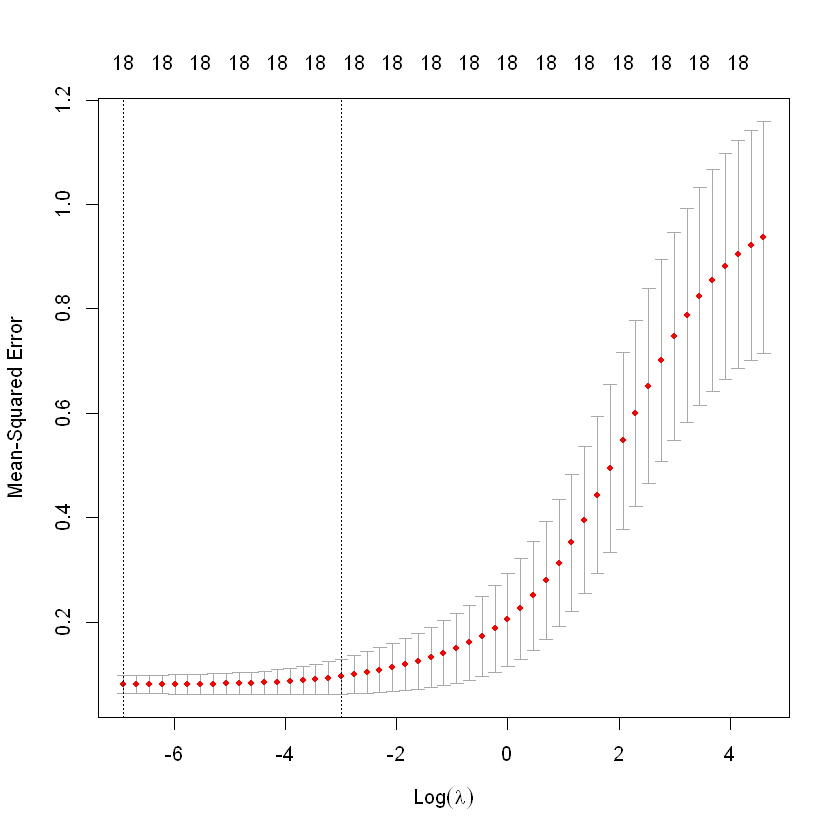

In [35]:
plot(ridgeCv)

-------------------------------------------------------------------------------------------------------------------------------
#### d. Fit a lasso model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [36]:
#Lasso is also a modification of lienar regression, here we select alpha value to be equal to 1 and find out the optimal lambda.
lambdas <- 10^seq(2, -3, by = -.1)

lassoReg <- cv.glmnet(x_train, y_train, alpha = 1, lambda = lambdas, standardize = TRUE, nfolds = 5)

optimalLambda <- lassoReg$lambda.min 
optimalLambda

[1] 0.01

In [37]:
#Building the lasso model
lassoModel <- glmnet(x_train, y_train, alpha = 1, lambda = optimalLambda, standardize = TRUE)

In [38]:
summary(lassoModel)

          Length Class     Mode   
a0         1     -none-    numeric
beta      18     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       6     -none-    call   
nobs       1     -none-    numeric

In [39]:
(lassoInfo <- postResample(predict(lassoModel, x_test), y_test))

RMSE  Rsquared       MAE 
0.2766792 0.9235192 0.1528792

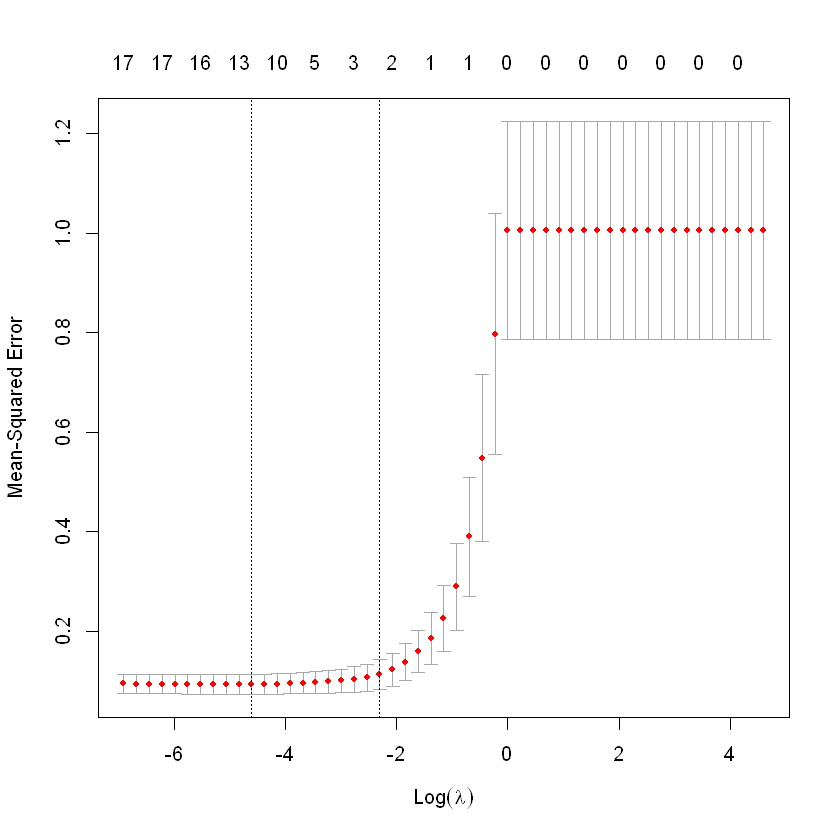

In [40]:
plot(lassoReg)

The RMSE and R-squared values for Lasso regression on test data are 0.26 and 0.927 respectively.

#### e. Comment more generally on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

To compare the models and determine the result, we will be using as_tibble method.

In [41]:
as_tibble(rbind(linearInfo,
      ridgeInfo,
      lassoInfo)) %>% mutate(model = c('Linear', 'Ridge', 'Lasso'))

RMSE,Rsquared,MAE,model
<dbl>,<dbl>,<dbl>,<chr>
0.2659326,0.9291887,0.1559887,Linear
0.2838387,0.9204052,0.1564854,Ridge
0.2766792,0.9235192,0.1528792,Lasso


as_tibble gives us the table of values from the 3 models and allows us to compare the values so we can determine the result.
To determine a model to be best among the three, the RMSE value should be least and R-squared value should be higher. We can observe Linear model is having least RMSE which is 0.2659326 and highest Rsquared value which is 0.9291887. There is not much difference among the test errors resulted from all these 3 approaches.

We can calculate the standard deviation value to determine if we can predict the number of college applications accurately.

In [42]:
testData %>% summarize(sd = sd(Apps))

sd
<dbl>
1


A good standard deviation should always be between +2 and -2, here our sd value is 1 which means our model can predict number of college applciations accurately.

### 2. The insurance company benchmark data set gives information on customers. Specifically, it contains 86 variables on product-usage data and socio-demographic data derived from zip area codes. There are 5,822 customers in the training set and another 4,000 in the test set. The data were collected to answer the following questions: Can you predict who will be interested in buying a caravan insurance policy and give an explanation why? Compute the OLS estimates and compare them with those obtained from the following variable-selection algorithms: Forwards Selection, Backwards Selection, Lasso regression, and Ridge regression. What methods performed the best in the prediction?  (The data can be downloaded from https://kdd.ics.uci.edu/databases/tic/tic.html. )

In [43]:
#Loading the dataset from the data link given in the question
trainData <- read.delim("ticdata2000.txt", header = FALSE, sep = "\t", dec = ".")
x_testData <- read.delim("ticeval2000.txt", header = FALSE, sep = "\t", dec = ".")
y_testData <- read.delim("tictgts2000.txt", header = FALSE, sep = "\t", dec = ".")

In [44]:
head(trainData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,3,2,8,0,5,1,3,7,⋯,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,1,0,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,⋯,0,0,0,1,0,0,0,0,0,0
6,23,1,2,1,5,0,5,0,5,0,⋯,0,0,0,0,0,0,0,0,0,0


In [45]:
dim(trainData)

[1] 5822   86

In [46]:
dim(x_testData)

[1] 4000   85

In [47]:
dim(y_testData)

[1] 4000    1

In [48]:
head(y_testData)

,V1
,<int>
1,0
2,1
3,0
4,0
5,0
6,0


In [49]:
names(y_testData)<-"V86"
testData = cbind(x_testData, y_testData)

From the structure and dimensions of the training and testing dataset, all the variables are integer type, even for the response variable V86. The target is a binary vector which tells us that there will not be much difference in model accuracy if the target variable is converted to factor or not because in a dataset to predict all variables are supposed t be categorical. So if we change the target variable, predictors also must change.

Let us find out how many customers have caravan policy and how many don't have by plotting ggplot.

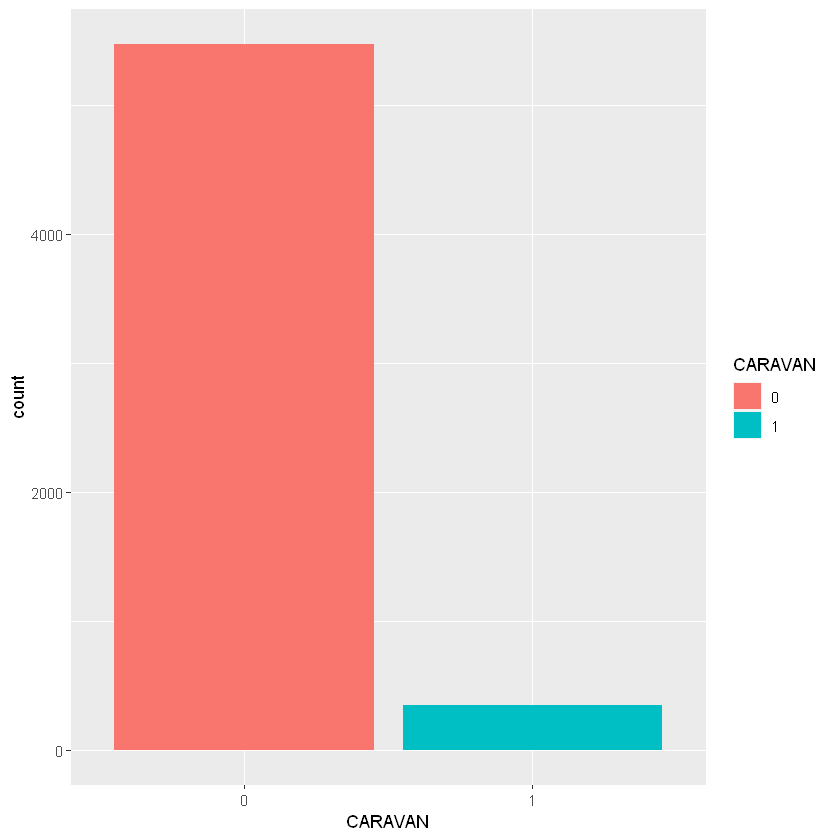

In [50]:
#V86 is the response variable
ggplot(trainData,aes(factor(V86))) + 
    geom_bar(aes(fill = factor(V86))) + 
    labs(x="CARAVAN") +
    scale_fill_discrete(name = "CARAVAN")

From the graph, we can understand that more than 5000 customers do not have the policy and around 300 customers have the policy. Now in order to explore the predictors, we have to find the correlation between independent variables and response variables.

In [51]:
#V1 is the Customer subtype
cor(trainData$V1, trainData$V86)

[1] -0.06938524

According the correlation value = -0.069, the two features have a weak negative correlation against Caravan policy.

In [52]:
#V2 is the number of houses
cor(trainData$V2, trainData$V86)

[1] -0.009809028

The correlation value is very low and we shouldn't consider this variable when fitting the model.

In [53]:
#Similarly we will find out other correlation coefficients to compare
correlationFunc<-function(variable){
    cor(variable, trainData$V86)
}

In [54]:
#V3- Average size household
print(correlationFunc(trainData$V3))
#V4 - Average Age
print(correlationFunc(trainData$V4))
#V4 - Customer Main Type
print(correlationFunc(trainData$V5))

[1] 0.03557316
[1] 0.004490697
[1] -0.06929983


From these values we can observe V1 and V5 are having same correlation values, and V3 can also be considered for fitting with the model.
But as we have to choose one among V1 and V5, we will find out the std deviation between the 2.

In [55]:
library(Hmisc)
describe(trainData[,c("V1","V5")])

Loading required package: survival


Attaching package: 'survival'


The following object is masked from 'package:caret':

    cluster


Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:base':

    format.pval, units




trainData[, c("V1", "V5")] 

 2  Variables      5822  Observations
--------------------------------------------------------------------------------
V1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    5822        0       40    0.996    24.25    14.38        3        6 
     .25      .50      .75      .90      .95 
      10       30       35       39       39 

lowest :  1  2  3  4  5, highest: 37 38 39 40 41
--------------------------------------------------------------------------------
V5 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    5822        0       10    0.972    5.774    3.207        1        2 
     .25      .50      .75      .90      .95 
       3        7        8        9        9 

lowest :  1  2  3  4  5, highest:  6  7  8  9 10
                                                                      
Value          1     2     3     4     5     6     7     8     9    10
Frequency    552   502   886    52   569   20

V1 has high std which will help us in modelling process.

Instead of calculating each of the correlations we can implement correlation matrix.

In [56]:
#We will exclude V2, V3, V4, V5 as we have already got their results.
trainDataDup<- data.frame(trainData[, -c(2,3,4,5)])

In [57]:
head(trainDataDup)

,V1,V6,V7,V8,V9,V10,V11,V12,V13,V14,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,0,5,1,3,7,0,2,1,2,⋯,0,0,0,1,0,0,0,0,0,0
2,37,1,4,1,4,6,2,2,0,4,⋯,0,0,0,1,0,0,0,0,0,0
3,37,0,4,2,4,3,2,4,4,4,⋯,0,0,0,1,0,0,0,0,0,0
4,9,2,3,2,4,5,2,2,2,3,⋯,0,0,0,1,0,0,0,0,0,0
5,40,1,4,1,4,7,1,2,2,4,⋯,0,0,0,1,0,0,0,0,0,0
6,23,0,5,0,5,0,6,3,3,5,⋯,0,0,0,0,0,0,0,0,0,0


In [58]:
#Excluding the response variable V86
corTrainingData<-cor(trainDataDup[, -c(86)])

In [59]:
summary(corTrainingData[upper.tri(corTrainingData)])

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.9995539 -0.0153139 -0.0004151  0.0091411  0.0259139  0.9875786 

In [60]:
maxCor<-findCorrelation(corTrainingData, cutoff = 0.70, names = TRUE)

In [61]:
maxCor

[1] "V18" "V36" "V31" "V34" "V10" "V12" "V59" "V52" "V65" "V46" "V74" "V9" 
[13] "V47" "V48" "V66" "V72" "V54" "V85" "V76" "V79" "V71" "V78" "V62" "V82"
[25] "V63" "V77" "V70" "V60"

These are the potential variables with high correlation. Let us check how they correlation with the target variable V86

In [62]:
targetCor<-data.frame(V86 = cor(trainDataDup[, sort(maxCor)], trainDataDup[,"V86"]))
dim(targetCor)
targetCor[order(targetCor$V86, decreasing = T),,drop = F]

[1] 28  1

,V86
,<dbl>
V47,0.1509097148
V82,0.1056995045
V59,0.0944459897
V65,0.0893874727
V31,0.0784289165
V10,0.0702638279
V85,0.0666578513
V36,0.0575181930
V76,0.0371176230


From this table, we can exclude the variables whose coefficient lower than 0.1 or 10%.

In [63]:
excludedVars<-row.names(targetCor[targetCor$V86<0.1, ,drop = F])
excludedVars

[1] "V10" "V12" "V18" "V31" "V34" "V36" "V46" "V48" "V52" "V54" "V59" "V60"
[13] "V62" "V63" "V65" "V66" "V70" "V71" "V72" "V74" "V76" "V77" "V78" "V79"
[25] "V85" "V9"

In [64]:
trainDataDup1 <-data.frame(trainDataDup[,!colnames(trainDataDup) %in% excludedVars])

In [65]:
dim(trainDataDup1)

[1] 5822   56

In [66]:
head(trainDataDup1)

,V1,V6,V7,V8,V11,V13,V14,V15,V16,V17,⋯,V68,V69,V73,V75,V80,V81,V82,V83,V84,V86
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,0,5,1,0,1,2,6,1,2,⋯,1,0,0,0,1,0,0,0,0,0
2,37,1,4,1,2,0,4,5,0,5,⋯,0,0,0,0,1,0,0,0,0,0
3,37,0,4,2,2,4,4,2,0,5,⋯,1,0,0,0,1,0,0,0,0,0
4,9,2,3,2,2,2,3,4,3,4,⋯,1,0,0,0,1,0,0,0,0,0
5,40,1,4,1,1,2,4,4,5,4,⋯,0,0,0,0,1,0,0,0,0,0
6,23,0,5,0,6,3,5,2,0,5,⋯,1,0,0,0,0,0,0,0,0,0


From the above findings, we can say that V47 and V82 are having high correlation and can be used as potential predictors.

In [67]:
#Computing OLS Estimates
lmFit<-lm(V86~., data=trainData)

In [68]:
lmFit


Call:
lm(formula = V86 ~ ., data = trainData)

Coefficients:
(Intercept)           V1           V2           V3           V4           V5  
  0.7685381    0.0035209   -0.0072642   -0.0012739    0.0107473   -0.0154869  
         V6           V7           V8           V9          V10          V11  
 -0.0056016   -0.0002069    0.0003569   -0.0030237    0.0086829    0.0020367  
        V12          V13          V14          V15          V16          V17  
  0.0055682   -0.0038250   -0.0050625   -0.0026253    0.0021357   -0.0048456  
        V18          V19          V20          V21          V22          V23  
 -0.0113977    0.0021884   -0.0004665   -0.0050974    0.0041254   -0.0006060  
        V24          V25          V26          V27          V28          V29  
  0.0019733   -0.0013674   -0.0031701   -0.0012603    0.0024879   -0.0008866  
        V30          V31          V32          V33          V34          V35  
 -0.0454201   -0.0432242    0.0085964    0.0077871    0.0047215   -0.

In [69]:
#To find out the estimates we can use "stargazer" method:
library("stargazer")


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [70]:
stargazer(lmFit, type='text')


                        Dependent variable:    
                    ---------------------------
                                V86            
-----------------------------------------------
V1                             0.004           
                              (0.002)          
                                               
V2                            -0.007           
                              (0.008)          
                                               
V3                            -0.001           
                              (0.007)          
                                               
V4                            0.011**          
                              (0.005)          
                                               
V5                            -0.015           
                              (0.010)          
                                               
V6                            -0.006           
                              (0.006)  

From the above results, OLS estimates are as follows:
- R2 : 0.073
- Adjusted R2 : 0.059
- Residual Std. Error: 0.230
- F Statistic: 5.306

In [71]:
#Forward Selection Algorithm
library(MASS)


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


The following object is masked from 'package:ISLR2':

    Boston




In [72]:
library(leaps)

In [73]:
regfit.fwd<-regsubsets(V86~.,data=trainData, nbest = 1, nvmax=85, 
                      method="forward")

In [74]:
sum_forward<-summary(regfit.fwd)

In [75]:
names(sum_forward)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [76]:
#Let's plot model selection measures for forward selection
par(mfrow=c(1,1))

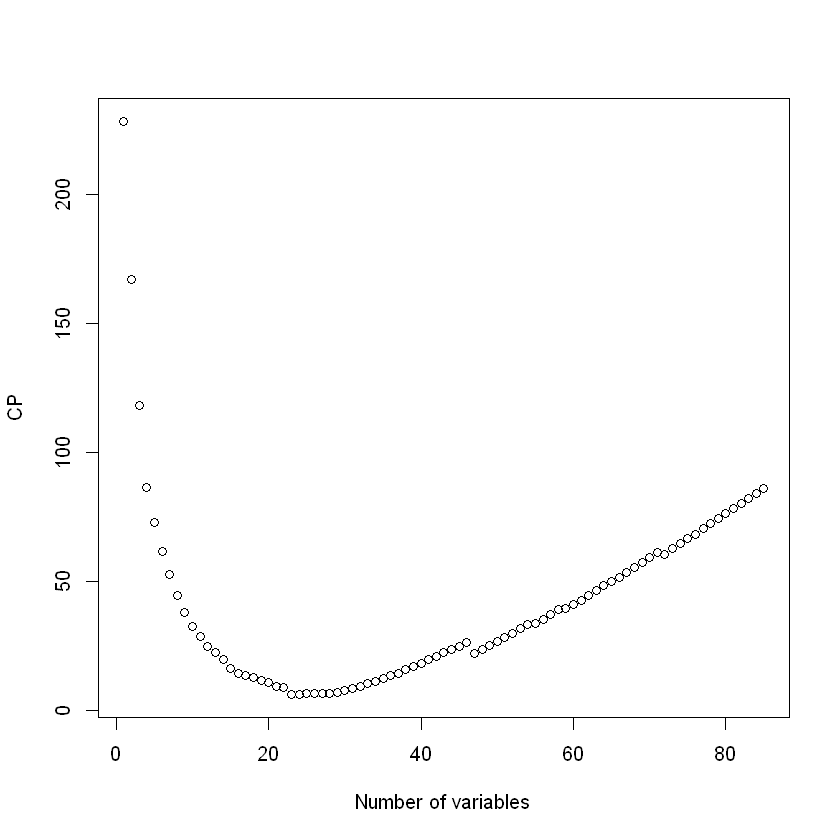

In [77]:
plot(sum_forward$cp, xlab="Number of variables", ylab="CP")

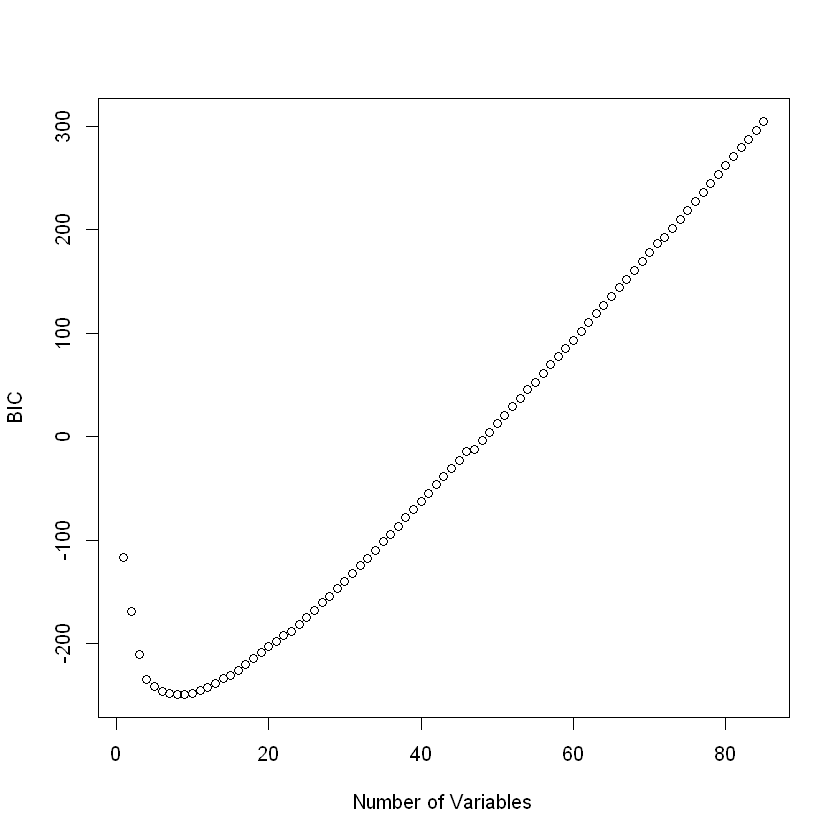

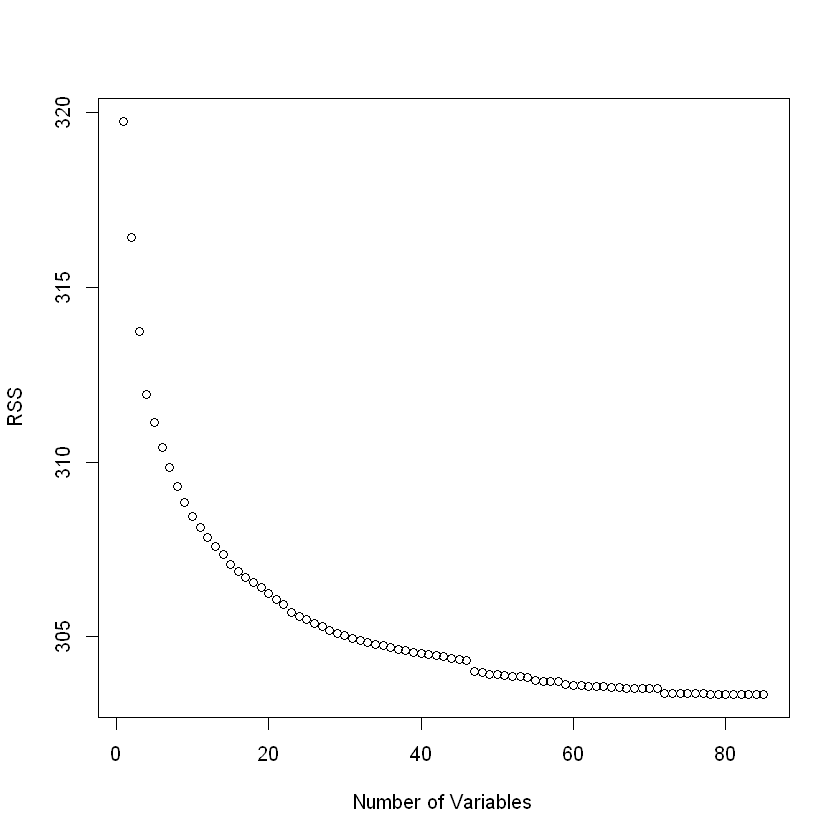

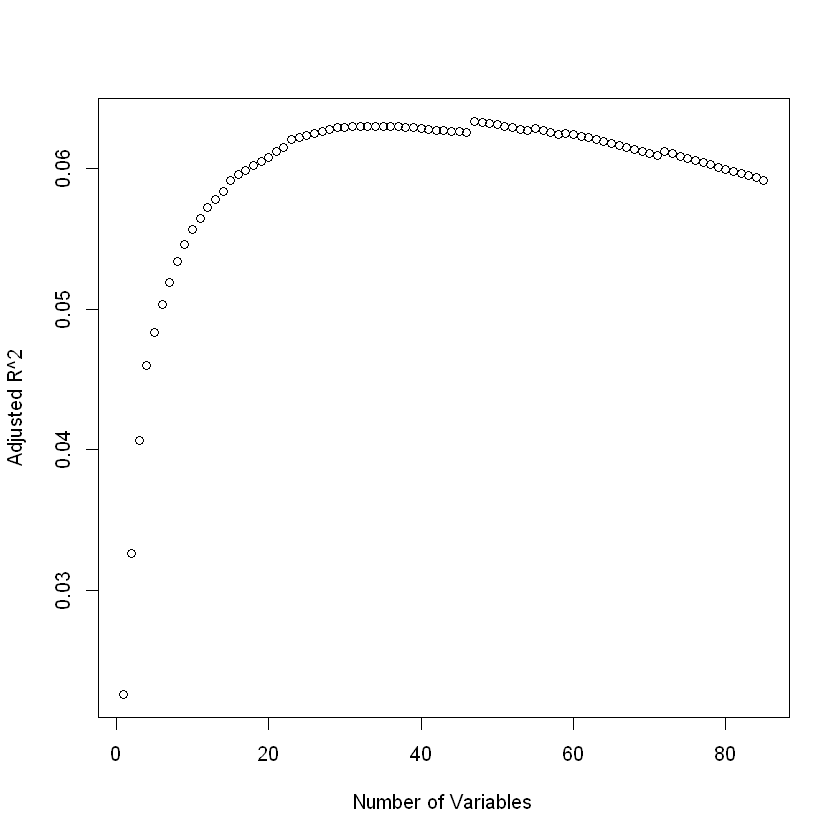

In [78]:
plot(sum_forward$bic, xlab = "Number of Variables", ylab = "BIC")
plot(sum_forward$rss, xlab = "Number of Variables", ylab = "RSS") 
plot(sum_forward$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2")

In [79]:
#Identifying the optimal models using model selection measures
print("Calculating the number of variables of best performing subset according to certain model selection measures")
which(sum_forward$cp == min(sum_forward$cp))
which(sum_forward$bic == min(sum_forward$bic)) 
which(sum_forward$rss == min(sum_forward$rss)) 
which(sum_forward$adjr2 == max(sum_forward$adjr2)) 

[1] "Calculating the number of variables of best performing subset according to certain model selection measures"


[1] 23

[1] 8

[1] 85

[1] 47

This says that model with 47 predictors has maximum adjusted r squared. We can use ‘coef’ function to get the coefficients of the predictors. We also have to specify the number of predictors also.

In [80]:
coef(regfit.fwd, 47)

(Intercept)           V2           V4           V6           V7           V8 
 0.664009021 -0.006650595  0.011689374 -0.003163891  0.002939187  0.002462010 
         V10          V14          V16          V18          V21          V22 
 0.003948120 -0.002224961  0.006268038 -0.006168798 -0.007083588  0.001788999 
         V23          V28          V30          V31          V32          V33 
-0.002369493  0.004075930 -0.035712164 -0.033696512  0.009752578  0.007974314 
         V34          V35          V36          V39          V41          V42 
 0.006550548 -0.055049399 -0.057986730 -0.001745550 -0.013827884  0.006127452 
         V43          V44          V46          V47          V50          V51 
 0.002320582  0.028340057 -0.013503474  0.010301949 -0.012922854  0.057801667 
         V53          V55          V57          V58          V59          V60 
-0.012342073 -0.015773961  0.194738072  0.066178213  0.012840296 -0.212511423 
         V61          V65          V72          V73          V76          V78 
-0.028636581 -0.036067910 -0.082885460 -0.012332348  0.037698347 -0.407493327 
         V79          V80          V81          V82          V83          V85 
-0.238363715 -0.020541519  0.546894821  0.362324659  0.035120459  0.070446650

In [81]:
#To store forward train and test errors

fwdtrainErrors <- matrix(rep(NA, 85))
fwdtestErrors <- matrix(rep(NA, 85))

In [82]:
#Defining a predict method for regsubsets
predict.regsubsets = function(object, newdata, id)
{
    form  = as.formula(object$call[[2]])
    mat   = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    xvars = names(coefi)
    mat[, xvars]%*%coefi
}

In [83]:
# calculating training and testing errors of all best p models selected via forward selection

for (i in 1:85) {
    
    y_pred_train = predict(regfit.fwd, newdata = trainData, id = i)
    y_pred_test  = predict(regfit.fwd, newdata = testData, id = i)
    
    y_pred_train = ifelse(y_pred_train > 0.5, 1, 0)
    y_pred_test  = ifelse(y_pred_test > 0.5, 1, 0)
    
    fwdtrainErrors[i] = mean(y_pred_train != trainData[, 86])
    fwdtestErrors[i]  = mean(y_pred_test  != testData[, 86])
}

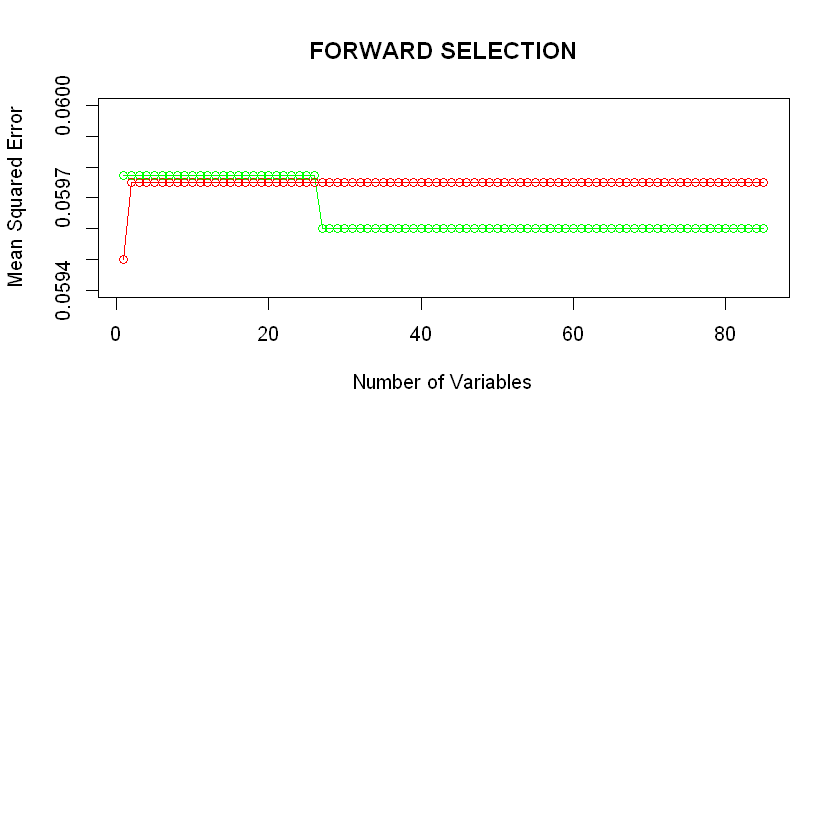

In [84]:
#plotting training and testing errors

par(mfrow = c(2,1))

plot(fwdtrainErrors, col = "green", type = "o", xlab = "Number of Variables", ylab = "Mean Squared Error",
    main = "FORWARD SELECTION", ylim = c(0.0594,0.06))
lines(fwdtestErrors, col = "red", type = "o")

In [85]:
MSE<-mean(fwdtestErrors)

In [86]:
RMSE<- sqrt(MSE)
RMSE

[1] 0.2444321

From the above results, Forward selection error estimates are as follows:
- RMSE: 0.2442

In [87]:
#Backward Selection algorithm
regfit.bwd<-regsubsets(V86~.,data=trainData, nbest = 1, nvmax=85, 
                      method="backward")

In [88]:
sum_backward<-summary(regfit.bwd)

In [89]:
names(sum_backward)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [90]:
#Let's plot model selection measures for backward selection
par(mfrow=c(2,2))

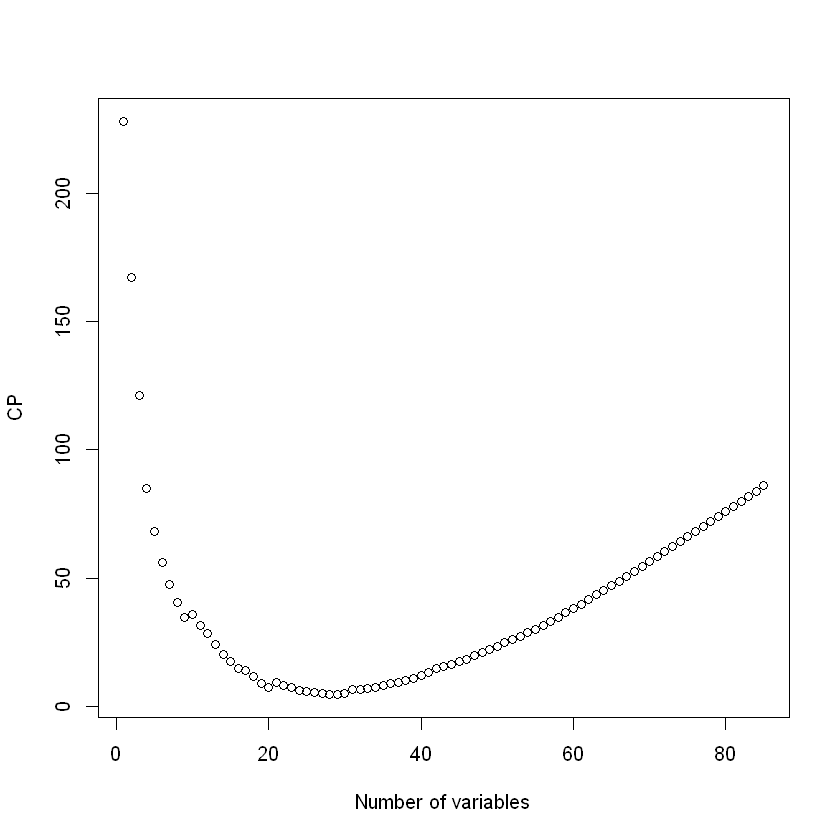

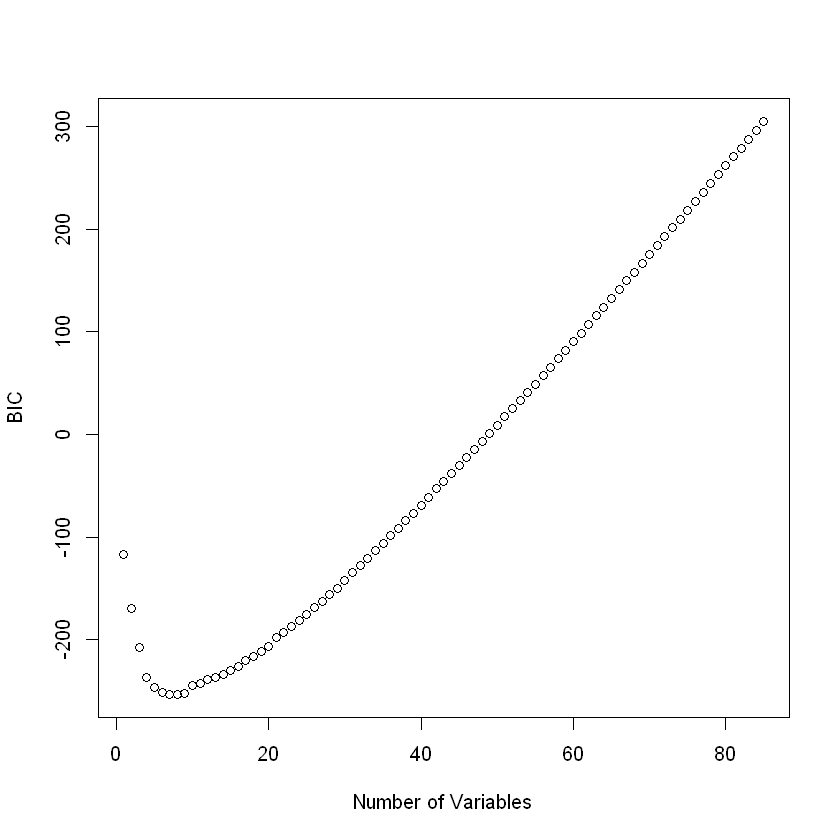

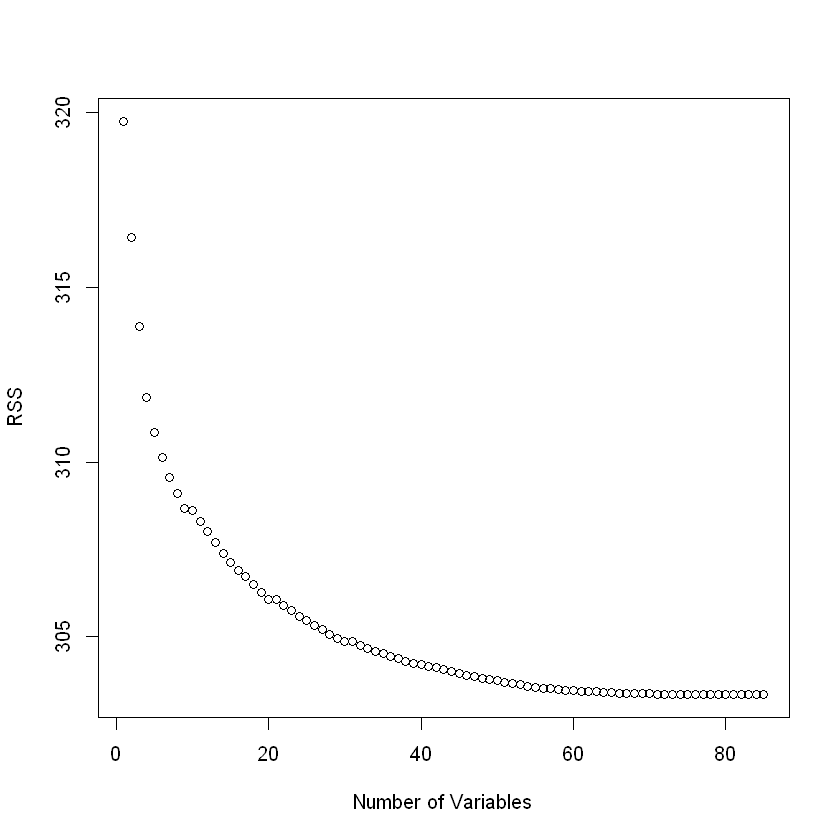

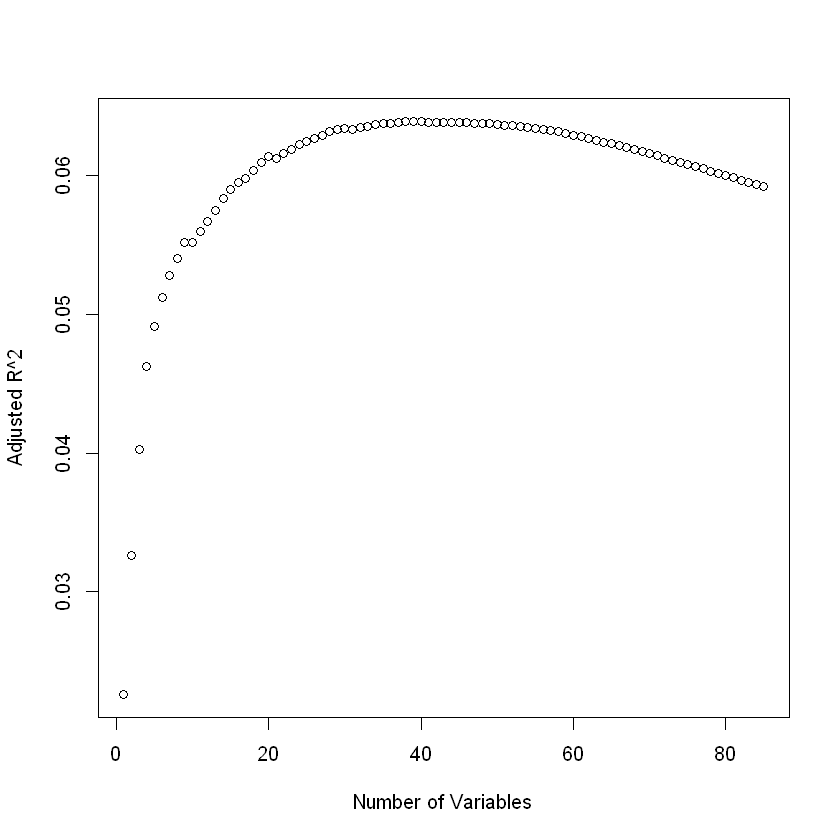

In [91]:
plot(sum_backward$cp, xlab="Number of variables", ylab="CP")
plot(sum_backward$bic, xlab = "Number of Variables", ylab = "BIC")
plot(sum_backward$rss, xlab = "Number of Variables", ylab = "RSS") 
plot(sum_backward$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2")

In [92]:
#Identifying the optimal models using model selection measures
print("Calculating the number of variables of best performing subset according to certain model selection measures")
which(sum_backward$cp == min(sum_backward$cp))
which(sum_backward$bic == min(sum_backward$bic)) 
which(sum_backward$rss == min(sum_backward$rss)) 
which(sum_backward$adjr2 == max(sum_backward$adjr2)) 

[1] "Calculating the number of variables of best performing subset according to certain model selection measures"


[1] 29

[1] 8

[1] 85

[1] 39

This says that model with 39 predictors has maximum adjusted r squared. We can use ‘coef’ function to get the coefficients of the predictors. We also have to specify the number of predictors also.

In [93]:
coef(regfit.bwd, 39)

(Intercept)           V1           V2           V4           V5           V6 
 0.618003554  0.003496801 -0.008350754  0.011998199 -0.015478361 -0.005103133 
          V9          V10          V14          V17          V18          V21 
-0.002252276  0.005075789 -0.002598805 -0.006537026 -0.012674064 -0.006269331 
         V22          V28          V30          V35          V36          V41 
 0.002959840  0.003341382 -0.002022241 -0.066474116 -0.069022567 -0.013140045 
         V42          V43          V44          V46          V47          V55 
 0.005547675  0.003063696  0.029345536 -0.016176979  0.010349309 -0.016765875 
         V57          V58          V59          V60          V63          V65 
 0.196968089  0.062888737  0.012815707 -0.182313564 -0.043519016 -0.038745752 
         V69          V76          V78          V79          V80          V81 
-0.027152367  0.039581714 -0.415223606 -0.225990862 -0.020473940  0.461507516 
         V82          V83          V84          V85 
 0.275107335  0.034444594  0.094548441  0.071665870

In [94]:
#To store backward train and test errors

bwdtrainErrors <- matrix(rep(NA, 85))
bwdtestErrors <- matrix(rep(NA, 85))

In [95]:
# calculating training and testing errors of all best p models selected via backward selection

for (i in 1:85) {
    
    y_pred_train = predict(regfit.bwd, newdata = trainData, id = i)
    y_pred_test  = predict(regfit.bwd, newdata = testData, id = i)
    
    y_pred_train = ifelse(y_pred_train > 0.5, 1, 0)
    y_pred_test  = ifelse(y_pred_test > 0.5, 1, 0)
    
    bwdtrainErrors[i] = mean(y_pred_train != trainData[, 86])
    bwdtestErrors[i]  = mean(y_pred_test  != testData[, 86])
}

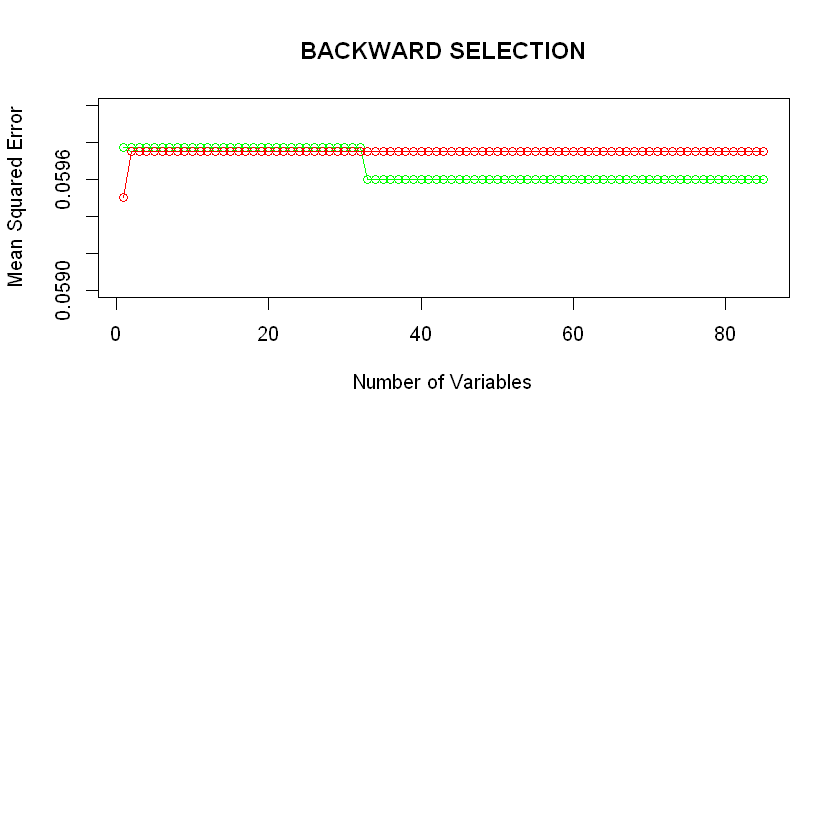

In [96]:
#plotting training and testing errors

par(mfrow = c(2,1))

plot(bwdtrainErrors, col = "green", type = "o", xlab = "Number of Variables", ylab = "Mean Squared Error",
    main = "BACKWARD SELECTION", ylim = c(0.059,0.06))
lines(bwdtestErrors, col = "red", type = "o")

In [97]:
MSE<-mean(bwdtestErrors)

In [98]:
RMSE<-sqrt(MSE)
RMSE

[1] 0.2444321

From the above results, Backward selection error estimates are as follows:
- RMSE: 0.2444

In [99]:
#Ridge Regression
x_trainData = trainData[, -86] #without response
y_trainData= trainData[, "V86"] #only response

In [100]:
dim(x_trainData)

[1] 5822   85

In [101]:
ridgeReg<-cv.glmnet(as.matrix(x_trainData),y_trainData,alpha=0)

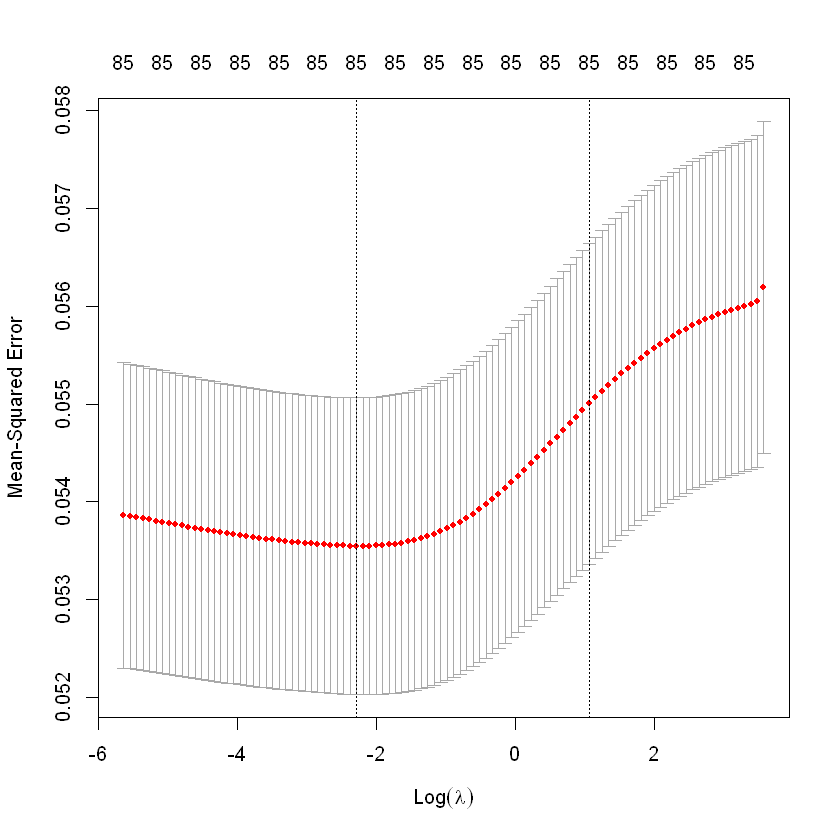

In [102]:
plot(ridgeReg)

In [103]:
bestCoeffRidge<-predict(ridgeReg, s = optimalLambda, type = "coefficients")
bestCoeffRidge

86 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -1.004037e-01
V1           3.966445e-04
V2          -6.225974e-03
V3          -2.020914e-03
V4           9.442341e-03
V5          -1.553153e-03
V6          -3.935816e-03
V7           1.195289e-03
V8           1.901551e-03
V9          -1.377498e-03
V10          3.762357e-03
V11         -1.045089e-03
V12          1.389662e-03
V13         -1.198060e-03
V14         -2.505333e-03
V15          2.787413e-04
V16          6.239924e-03
V17         -2.562055e-05
V18         -5.582449e-03
V19          1.406718e-03
V20          3.911372e-04
V21         -5.821492e-03
V22          3.591038e-03
V23         -6.496144e-04
V24          1.233614e-03
V25         -1.771838e-04
V26         -1.511658e-03
V27         -4.301799e-04
V28          2.785751e-03
V29         -1.899429e-04
V30         -1.614437e-03
V31          5.191931e-04
V32          4.424484e-03
V33          3.658868e-03
V34          1.305004e-03
V35          3.105348e

In [104]:
(ridgeInfo <- postResample(predict(ridgeReg, as.matrix(x_testData)), y_testData))

RMSE   Rsquared        MAE 
0.23428161 0.03411572 0.11089703

From the above results, Ridge regression error estimates are as follows:
- R2 : 0.0312
- Residual Std. Error: 0.2355
- MAE: 0.11

In [105]:
#Lasso Regression
lassoFit <- cv.glmnet(as.matrix(x_trainData), y_trainData, alpha=1)

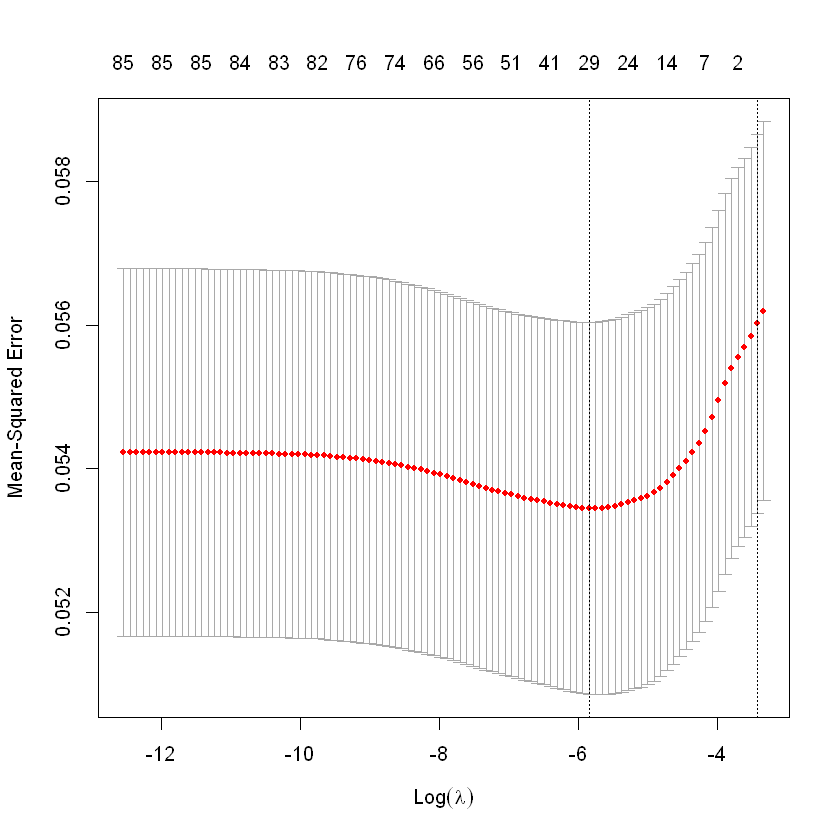

In [106]:
plot(lassoFit)

In [107]:
best_lasso_coeff <- predict(lassoFit, s= optimalLambda, type = "coefficients")
best_lasso_coeff

86 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  1.865276e-03
V1           .           
V2           .           
V3           .           
V4           .           
V5           .           
V6           .           
V7           .           
V8           .           
V9           .           
V10          8.941229e-04
V11          .           
V12          .           
V13          .           
V14          .           
V15          .           
V16          1.437766e-03
V17          .           
V18         -2.084670e-03
V19          .           
V20          .           
V21         -2.917925e-04
V22          .           
V23          .           
V24          .           
V25          .           
V26          .           
V27          .           
V28          .           
V29          .           
V30         -1.756856e-04
V31          .           
V32          6.282798e-04
V33          .           
V34          .           
V35          .        

In [108]:
(lassoInfo <- postResample(predict(lassoFit, as.matrix(x_testData)), y_testData))

RMSE   Rsquared        MAE 
0.23620763 0.01365607 0.11195134

From the above results, lasso regression error estimates are as follows:
- R2 : 0.0137
- Residual Std. Error: 0.236
- MAE: 0.111

Lower the RMSE value, better the model is for prediction. 
From the above error estimates using OLS, Forward selection, Backward selection, Ridge and Lasso regression methods, we can determine that all the models are performing better but using OLS estimates, RMSE value is 0.230 which is the least.
Hence, from all of the models Linear regression performed the best for our dataset.

### 3. ESL textbook exercise 2.8 modified: Compare the classification performance of linear regression and k-nearest neighbor classification on the zipcode data. In particular, consider only the 7’s and 9’s for this problem, and k = 1, 3, 5, 7, 9, 11, 13,15. Show the test error for each choice of k. Describe your results – are you surprised by the differences in performance? The zipcode data is available https://hastie.su.domains/ElemStatLearn/ in the “Data” tab. The data can be obtained as test/training and/or by number.

In [109]:
#Loading the train data from "zip.train.gz" using the given link
x_train <- read.table(gzfile("zip.train.gz"))
y <- which(x_train[, 1] == 7 | x_train[, 1] == 9)
x_train <- x_train[y,]
y_train <- x_train[y, 1]
head(x_train)
dim(x_train)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,⋯,-0.318,1.000,0.536,-0.987,-1,-1,-1,-1,-1,-1
11,7,-1,-1,-1,-1.000,-1.000,-0.596,0.912,1.000,0.290,⋯,-1.000,-0.795,0.663,-0.074,-1,-1,-1,-1,-1,-1
15,7,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,⋯,-1.000,-0.967,0.866,-0.001,-1,-1,-1,-1,-1,-1
16,7,-1,-1,-1,-0.929,0.351,0.798,0.806,0.114,0.015,⋯,0.835,-0.086,-0.991,-1.000,-1,-1,-1,-1,-1,-1
23,7,-1,-1,-1,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,⋯,-0.933,0.667,-0.315,-1.000,-1,-1,-1,-1,-1,-1
26,7,-1,-1,-1,-1.000,-0.846,-0.011,-0.920,-1.000,-1.000,⋯,-1.000,0.008,0.405,-1.000,-1,-1,-1,-1,-1,-1


[1] 1289  257

In [110]:
#Loading the test data from "zip.test.gz" using the given link
x_test <- read.table(gzfile("zip.test.gz"))
y <- which(x_test[, 1] == 7 | x_test[, 1] == 9)
x_test<- x_test[y,]
dim(x_test)
head(x_test)

[1] 324 257

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,-1,-1.00,-1.000,-1.000,-1.000,-0.948,-0.561,0.148,0.384,⋯,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1,-1,-1,-1
10,9,-1,-1.00,-1.000,-1.000,-1.000,-0.904,-0.060,0.638,0.678,⋯,-0.567,0.642,-0.925,-1.000,-1.000,-1.000,-1,-1,-1,-1
19,9,-1,-1.00,-1.000,-0.916,-0.600,-0.034,0.711,1.000,0.488,⋯,1.000,0.375,-0.982,-1.000,-1.000,-1.000,-1,-1,-1,-1
24,9,-1,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000,-0.441,0.530,⋯,-1.000,-1.000,-1.000,-0.057,0.558,-0.999,-1,-1,-1,-1
31,7,-1,-0.99,0.700,0.283,-0.131,-0.598,-1.000,-1.000,-1.000,⋯,-0.700,0.734,-0.261,-1.000,-1.000,-1.000,-1,-1,-1,-1
35,7,-1,-1.00,-0.862,0.000,0.296,-0.231,0.142,0.384,0.763,⋯,0.703,-0.448,-1.000,-1.000,-1.000,-1.000,-1,-1,-1,-1


In [111]:
#Performing Classification of Linear Regression
lr <- lm(V1 ~., data = x_train)

In [112]:
#Finding out the linear regression predict value
lr_predict <- predict(lr, x_test)

Warning message in predict.lm(lr, x_test):
"prediction from a rank-deficient fit may be misleading"


In [113]:
#Calculating the error value
lr_error <-  mean((lr_predict - x_test$V1)^2)
lr_error

[1] 1.780327e+26

Linear regression error value is 1.780327

In [114]:
#Classification performance using k-nn model
library(class)
k <- c(1, 3, 5, 7, 9, 11, 13, 15)
k_error <- rep(NA, length(k))
for (i in 1:length(k)) {
    knn_predict <- knn(x_trainData, x_testData, x_trainData$V1, k[i])
    k_error[i] <- mean((knn_predict != x_testData$V1))
}

In [115]:
for(i in 1:8)
    print(k_error[i])

[1] 0.137
[1] 0.18
[1] 0.20275
[1] 0.214
[1] 0.2295
[1] 0.2515
[1] 0.2595
[1] 0.274


In [116]:
error <- matrix(c(lr_error, k_error), ncol = 1)
colnames(error) <- c("Error Rate")
rownames(error) <- c("Linear Regression", paste("k-NN with k =", k))
error

,Error Rate
Linear Regression,1.780327e+26
k-NN with k = 1,1.370000e-01
k-NN with k = 3,1.800000e-01
k-NN with k = 5,2.027500e-01
k-NN with k = 7,2.140000e-01
k-NN with k = 9,2.295000e-01
k-NN with k = 11,2.515000e-01
k-NN with k = 13,2.595000e-01
k-NN with k = 15,2.740000e-01


The error rate of Linear regression is varying by a lot with knn regression. The knn outperforms Linear regression very well. This signifies that the knn regression is a very good and better method for classification when compared with Linear regression.The training error results are reduced by the fact that there is one direct hit. The amount of error goes up as the number of neighbors is increased.